# Exploratory Data Analysis
Basic correlations, distributions, and stories from the merged S&P 500 dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use("seaborn-v0_8-whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

df = pd.read_csv("../data/merged_dataset.csv", parse_dates=["date"])
print(f"Shape: {df.shape}")
df.head()

Shape: (1264542, 43)


,date,ticker,adj_close,close,high,low,open,volume,daily_return,log_return,...,Yield_Spread,Regime_GMM,Regime_label,news_count,sentiment_mean,sentiment_sum,positive_count,negative_count,neutral_count,sentiment_ratio
0,2016-02-10,A,33.100433,35.849998,36.730000,35.529999,35.630001,3170000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-02-11,A,32.620323,35.330002,35.610001,34.939999,35.119999,3224000.0,-0.014505,-0.014611,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-02-12,A,33.442055,36.220001,36.230000,35.520000,35.840000,3923600.0,0.025191,0.024879,...,0.027053,0.0,Stressful,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-02-16,A,34.236099,37.080002,37.169998,36.400002,36.720001,2903600.0,0.023744,0.023466,...,NaN,NaN,NaN,5.0,0.071832,0.359162,1.0,0.0,4.0,0.200000
4,2016-02-17,A,34.965500,37.869999,38.130001,34.750000,35.220001,5382300.0,0.021305,0.021081,...,NaN,NaN,NaN,3.0,-0.620664,-1.861993,0.0,2.0,1.0,-0.666667


In [2]:
df.info(show_counts=True)

<class 'pandas.DataFrame'>
RangeIndex: 1264542 entries, 0 to 1264541
Data columns (total 43 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   date                 1264542 non-null  datetime64[us]
 1   ticker               1264542 non-null  str           
 2   adj_close            1229163 non-null  float64       
 3   close                1229163 non-null  float64       
 4   high                 1229163 non-null  float64       
 5   low                  1229163 non-null  float64       
 6   open                 1229163 non-null  float64       
 7   volume               1229163 non-null  float64       
 8   daily_return         1228659 non-null  float64       
 9   log_return           1228659 non-null  float64       
 10  rolling_mean_20      1219587 non-null  float64       
 11  rolling_std_20       1219587 non-null  float64       
 12  Exchange             1196664 non-null  str           
 13  Shortnam

In [3]:
df.describe()

,date,adj_close,close,high,low,open,volume,daily_return,log_return,rolling_mean_20,...,VIX,Yield_Spread,Regime_GMM,news_count,sentiment_mean,sentiment_sum,positive_count,negative_count,neutral_count,sentiment_ratio
count,1264542,1.229163e+06,1.229163e+06,1.229163e+06,1.229163e+06,1.229163e+06,1.229163e+06,1.228659e+06,1.228659e+06,1.219587e+06,...,201200.000000,201200.000000,201200.000000,79371.000000,79371.000000,79371.000000,79371.000000,79371.000000,79371.000000,79371.000000
mean,2021-02-06 04:04:00.572792,1.362032e+02,1.439953e+02,1.456383e+02,1.422867e+02,1.439739e+02,6.476114e+06,7.668113e-04,5.418679e-04,1.361185e+02,...,-0.156280,-0.633169,0.610000,2.023573,0.037666,0.056775,0.561981,0.499200,0.962392,0.048775
min,2016-02-10 00:00:00,6.171321e-01,6.325000e-01,6.390000e-01,6.187500e-01,6.195000e-01,0.000000e+00,-5.386473e-01,-7.735925e-01,7.428885e-01,...,-1.290855,-2.240967,0.000000,1.000000,-0.976264,-15.942830,0.000000,0.000000,0.000000,-1.000000
25%,2018-08-08 00:00:00,4.211338e+01,4.789000e+01,4.843000e+01,4.732579e+01,4.789000e+01,1.021000e+06,-8.260304e-03,-8.294610e-03,4.221187e+01,...,-0.813705,-0.917051,0.000000,1.000000,-0.188639,-0.530434,0.000000,0.000000,0.000000,-0.250000
50%,2021-02-06 12:00:00,7.821635e+01,8.621000e+01,8.717000e+01,8.523000e+01,8.620000e+01,2.178400e+06,8.627777e-04,8.624057e-04,7.831646e+01,...,-0.390525,-0.602350,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,2023-08-08 00:00:00,1.478517e+02,1.588700e+02,1.606300e+02,1.570500e+02,1.588700e+02,5.033600e+06,9.922579e-03,9.873674e-03,1.478444e+02,...,0.235658,-0.100455,1.000000,2.000000,0.388182,0.743479,1.000000,1.000000,1.000000,0.500000
max,2026-02-09 00:00:00,9.924400e+03,9.924400e+03,9.964770e+03,9.794000e+03,9.914170e+03,3.692928e+09,7.459324e-01,5.572887e-01,9.672676e+03,...,5.688545,0.623901,2.000000,41.000000,0.960210,15.866289,22.000000,23.000000,20.000000,1.000000
std,NaN,2.980634e+02,2.990377e+02,3.025174e+02,2.955177e+02,2.989739e+02,2.702490e+07,2.116787e-02,2.124206e-02,2.973972e+02,...,0.931994,0.662571,0.502893,2.164819,0.528763,1.027521,0.983637,0.906368,1.196203,0.629443


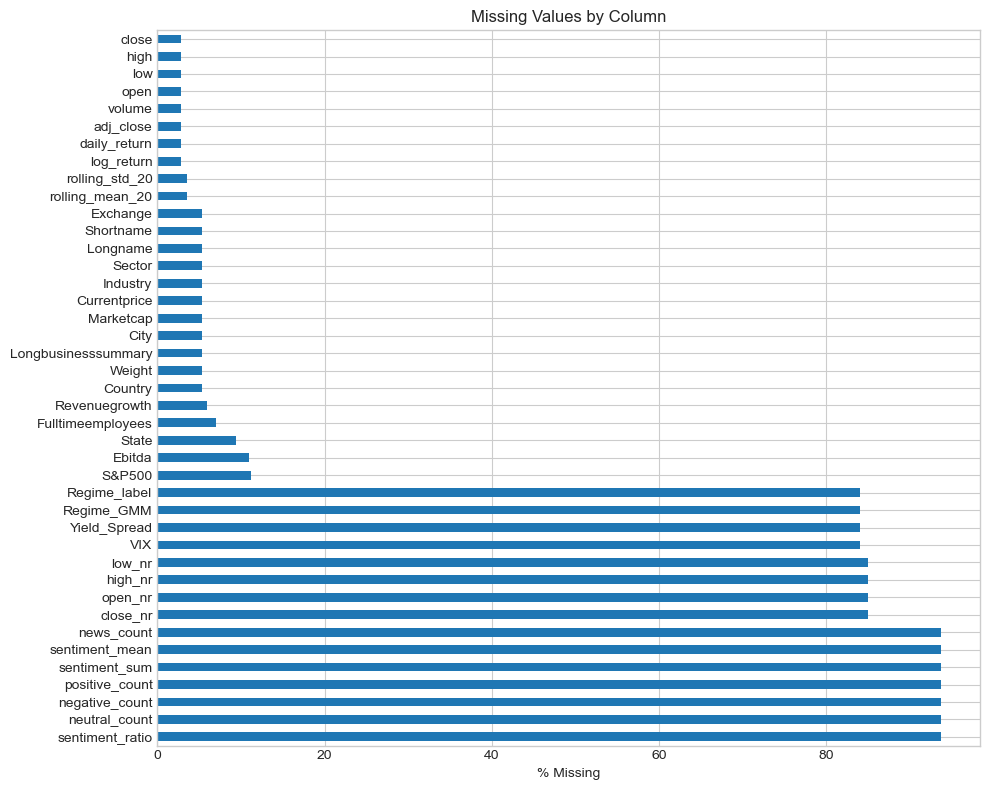

In [4]:
# Missing values per column (% of total rows)
missing = df.isnull().mean().sort_values(ascending=False) * 100
missing[missing > 0].plot.barh(figsize=(10, 8))
plt.xlabel("% Missing")
plt.title("Missing Values by Column")
plt.tight_layout()
plt.show()

## 1. Correlation Heatmap

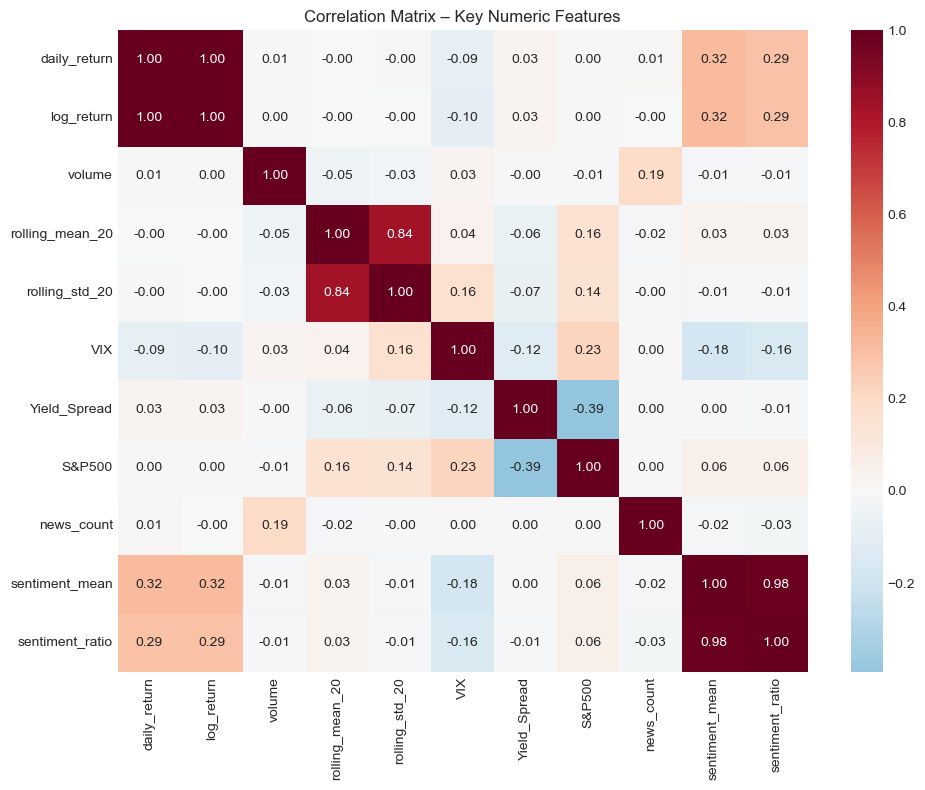

In [5]:
corr_cols = [
    "daily_return", "log_return", "volume", "rolling_mean_20", "rolling_std_20",
    "VIX", "Yield_Spread", "S&P500",
    "news_count", "sentiment_mean", "sentiment_ratio",
]
corr = df[corr_cols].corr()

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="RdBu_r", center=0, ax=ax)
ax.set_title("Correlation Matrix – Key Numeric Features")
plt.tight_layout()
plt.show()

## 2. Daily Return Distribution

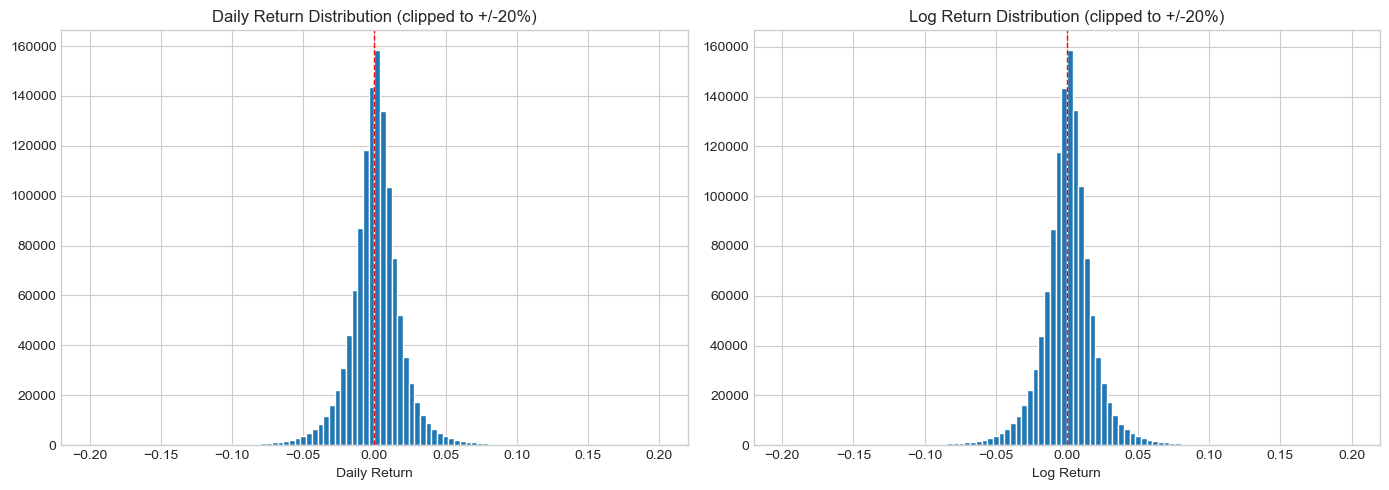

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

df["daily_return"].dropna().clip(-0.2, 0.2).hist(bins=100, ax=axes[0], edgecolor="white")
axes[0].set_title("Daily Return Distribution (clipped to +/-20%)")
axes[0].set_xlabel("Daily Return")
axes[0].axvline(0, color="red", ls="--", lw=1)

df["log_return"].dropna().clip(-0.2, 0.2).hist(bins=100, ax=axes[1], edgecolor="white")
axes[1].set_title("Log Return Distribution (clipped to +/-20%)")
axes[1].set_xlabel("Log Return")
axes[1].axvline(0, color="red", ls="--", lw=1)

plt.tight_layout()
plt.show()

## 3. VIX vs Daily Returns

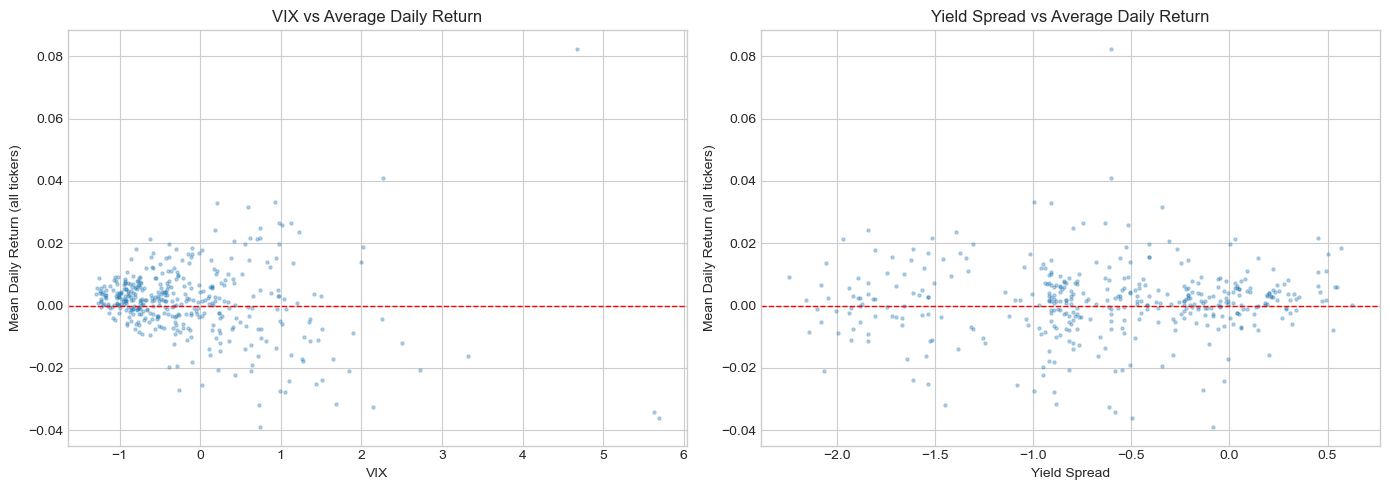

In [7]:
# Aggregate to daily level for a cleaner picture
daily = df.groupby("date").agg(
    mean_return=("daily_return", "mean"),
    VIX=("VIX", "first"),
    Yield_Spread=("Yield_Spread", "first"),
    sp500=("S&P500", "first"),
).dropna()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].scatter(daily["VIX"], daily["mean_return"], alpha=0.3, s=5)
axes[0].set_xlabel("VIX")
axes[0].set_ylabel("Mean Daily Return (all tickers)")
axes[0].set_title("VIX vs Average Daily Return")
axes[0].axhline(0, color="red", ls="--", lw=1)

axes[1].scatter(daily["Yield_Spread"], daily["mean_return"], alpha=0.3, s=5)
axes[1].set_xlabel("Yield Spread")
axes[1].set_ylabel("Mean Daily Return (all tickers)")
axes[1].set_title("Yield Spread vs Average Daily Return")
axes[1].axhline(0, color="red", ls="--", lw=1)

plt.tight_layout()
plt.show()

## 4. Market Regimes

                  mean       std   count
Regime_label                            
Calm          0.002160  0.015516  114800
Stressful    -0.000203  0.023836   77975
Transitional  0.003880  0.073545    1462


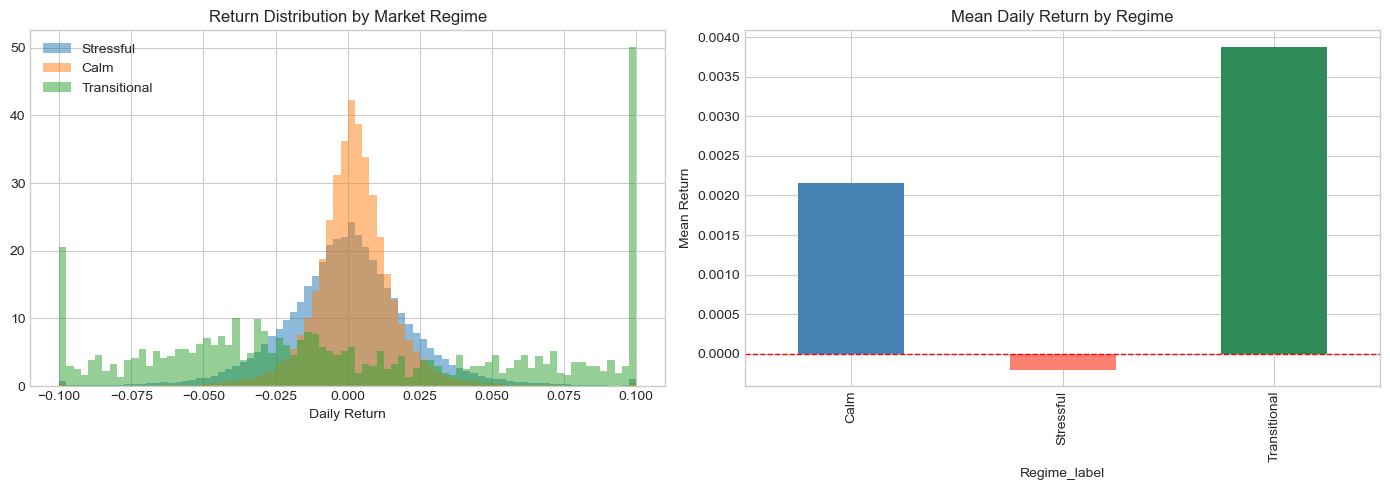

In [8]:
regime_stats = df.groupby("Regime_label")["daily_return"].agg(["mean", "std", "count"])
print(regime_stats)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for label in df["Regime_label"].dropna().unique():
    subset = df.loc[df["Regime_label"] == label, "daily_return"].dropna().clip(-0.1, 0.1)
    axes[0].hist(subset, bins=80, alpha=0.5, label=label, density=True)
axes[0].set_title("Return Distribution by Market Regime")
axes[0].set_xlabel("Daily Return")
axes[0].legend()

regime_stats["mean"].plot.bar(ax=axes[1], color=["steelblue", "salmon", "seagreen", "orange"][:len(regime_stats)])
axes[1].set_title("Mean Daily Return by Regime")
axes[1].set_ylabel("Mean Return")
axes[1].axhline(0, color="red", ls="--", lw=1)

plt.tight_layout()
plt.show()

## 5. News Sentiment vs Returns

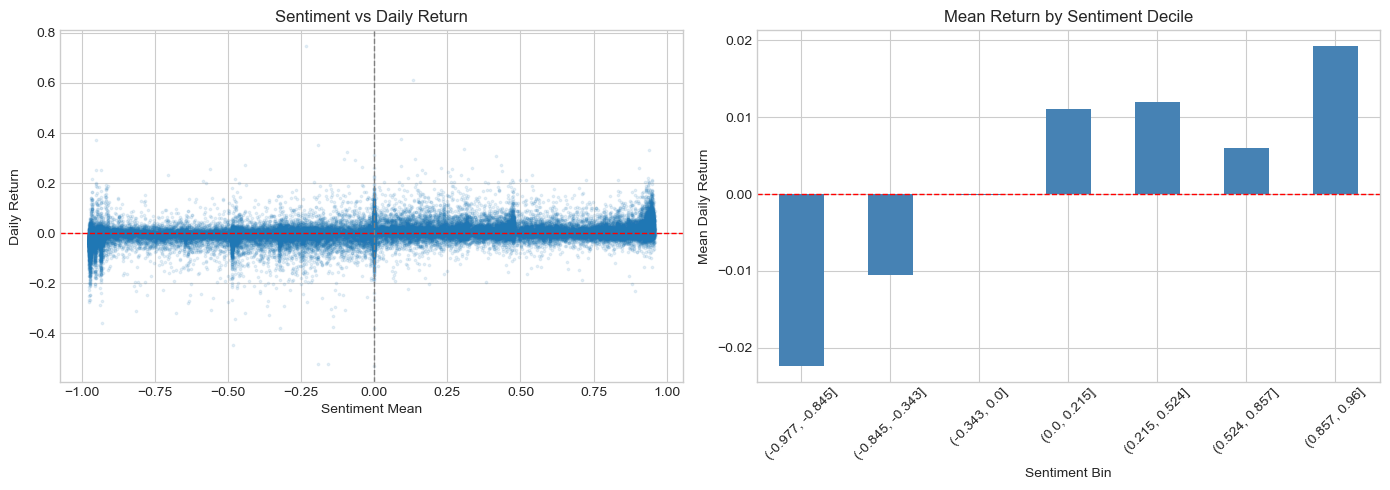

In [9]:
sent = df.dropna(subset=["sentiment_mean", "daily_return"]).copy()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].scatter(sent["sentiment_mean"], sent["daily_return"], alpha=0.1, s=3)
axes[0].set_xlabel("Sentiment Mean")
axes[0].set_ylabel("Daily Return")
axes[0].set_title("Sentiment vs Daily Return")
axes[0].axhline(0, color="red", ls="--", lw=1)
axes[0].axvline(0, color="grey", ls="--", lw=1)

# Bin sentiment into quantiles and look at average return
sent["sent_bin"] = pd.qcut(sent["sentiment_mean"], q=10, duplicates="drop")
bin_stats = sent.groupby("sent_bin", observed=True)["daily_return"].mean()
bin_stats.plot.bar(ax=axes[1], color="steelblue")
axes[1].set_title("Mean Return by Sentiment Decile")
axes[1].set_ylabel("Mean Daily Return")
axes[1].set_xlabel("Sentiment Bin")
axes[1].axhline(0, color="red", ls="--", lw=1)
axes[1].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

## 6. Sector Analysis

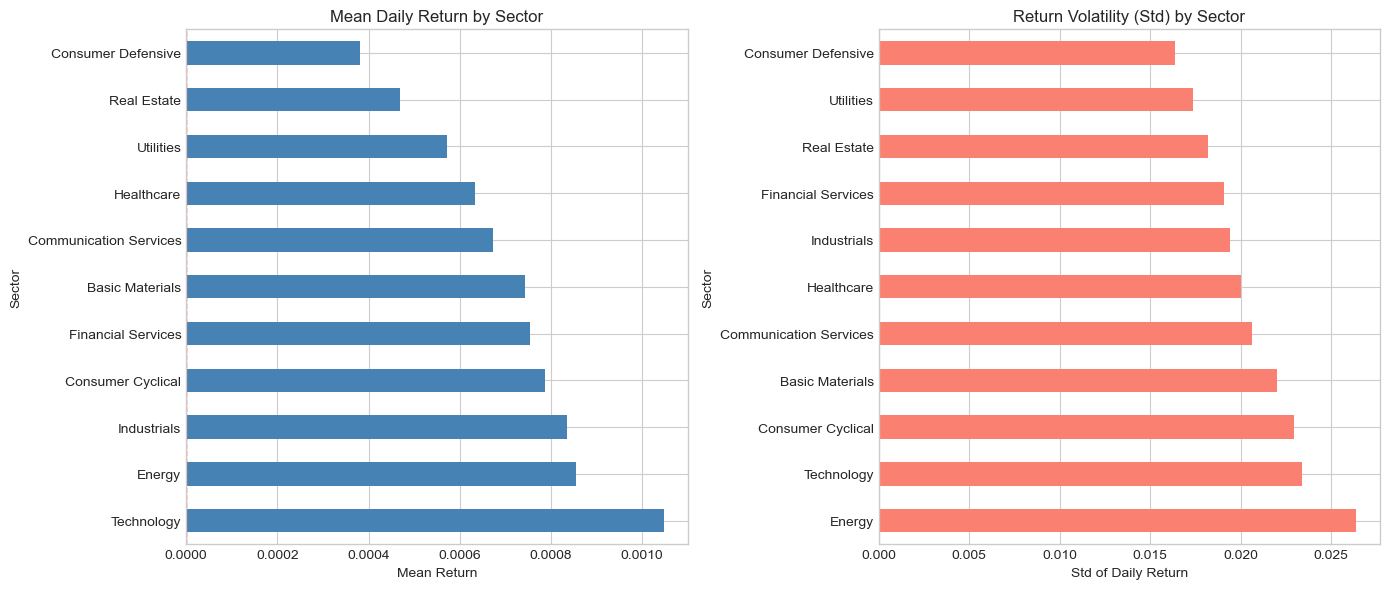

In [10]:
sector_stats = (
    df.groupby("Sector")["daily_return"]
    .agg(["mean", "std", "count"])
    .sort_values("mean", ascending=False)
)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sector_stats["mean"].plot.barh(ax=axes[0], color="steelblue")
axes[0].set_title("Mean Daily Return by Sector")
axes[0].set_xlabel("Mean Return")
axes[0].axvline(0, color="red", ls="--", lw=1)

sector_stats["std"].sort_values(ascending=False).plot.barh(ax=axes[1], color="salmon")
axes[1].set_title("Return Volatility (Std) by Sector")
axes[1].set_xlabel("Std of Daily Return")

plt.tight_layout()
plt.show()

## 7. S&P 500 Index Over Time

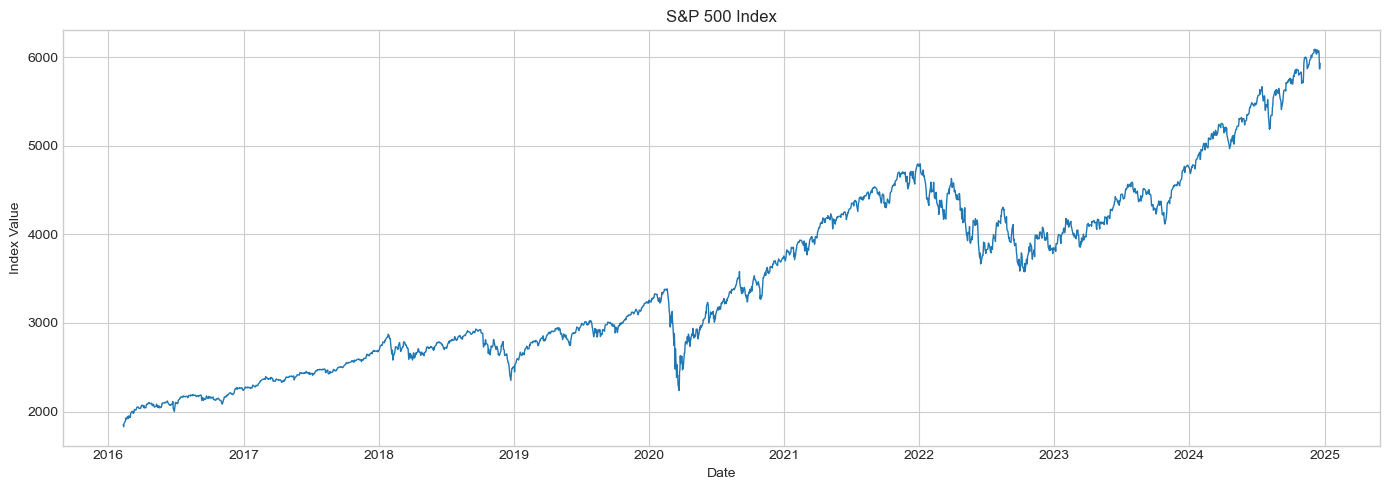

In [11]:
sp_ts = df[["date", "S&P500"]].drop_duplicates(subset=["date"]).dropna().sort_values("date")

fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(sp_ts["date"], sp_ts["S&P500"], lw=1)
ax.set_title("S&P 500 Index")
ax.set_xlabel("Date")
ax.set_ylabel("Index Value")
plt.tight_layout()
plt.show()

## 8. Volume & Volatility

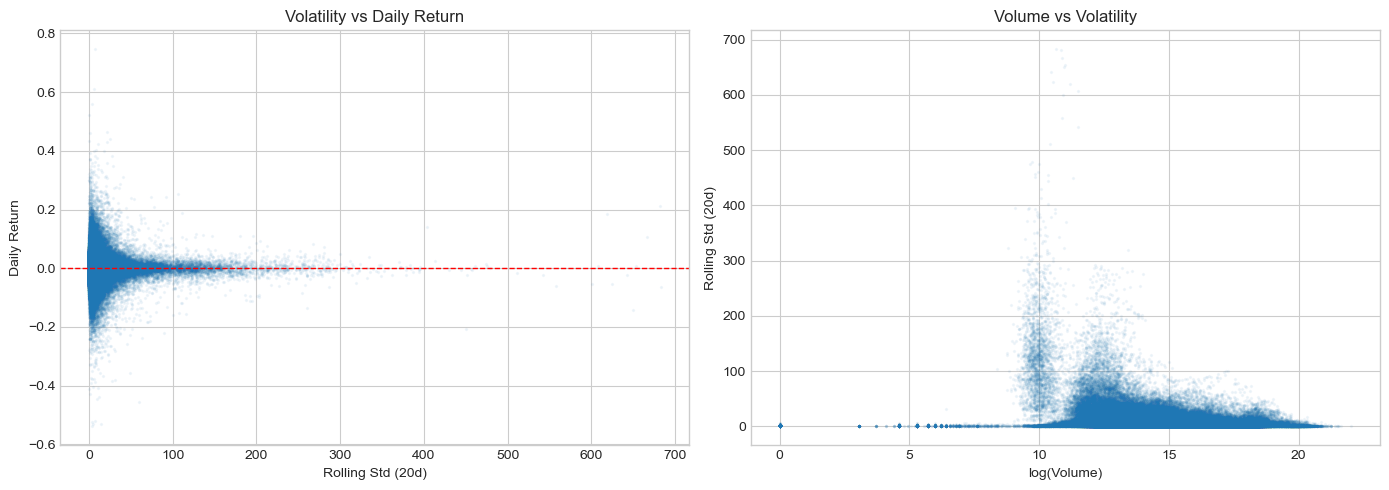

In [12]:
vol = df.dropna(subset=["rolling_std_20", "volume"]).copy()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].scatter(vol["rolling_std_20"], vol["daily_return"], alpha=0.05, s=2)
axes[0].set_xlabel("Rolling Std (20d)")
axes[0].set_ylabel("Daily Return")
axes[0].set_title("Volatility vs Daily Return")
axes[0].axhline(0, color="red", ls="--", lw=1)

axes[1].scatter(np.log1p(vol["volume"]), vol["rolling_std_20"], alpha=0.05, s=2)
axes[1].set_xlabel("log(Volume)")
axes[1].set_ylabel("Rolling Std (20d)")
axes[1].set_title("Volume vs Volatility")

plt.tight_layout()
plt.show()

## 9. Sentiment Coverage Over Time

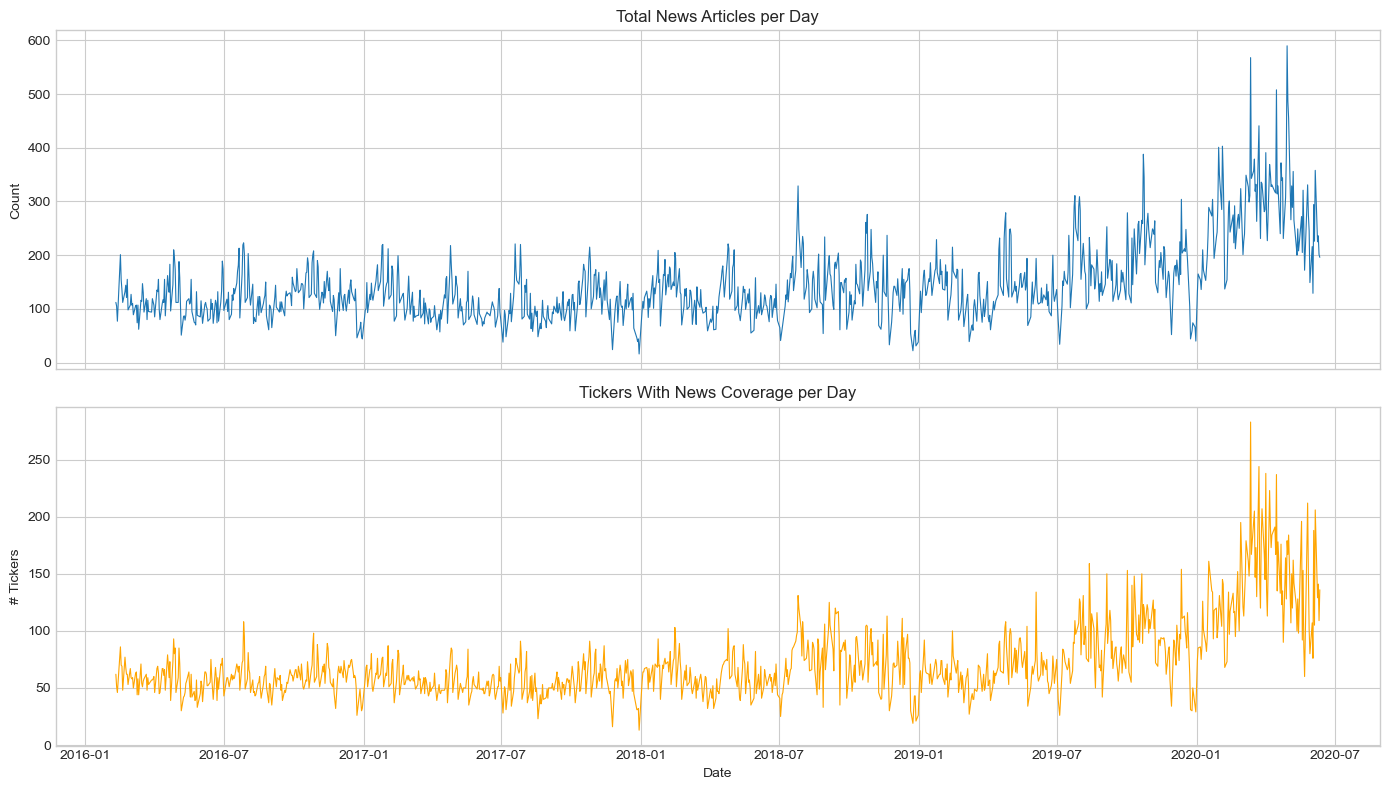

In [13]:
sent_daily = (
    df.dropna(subset=["news_count"])
    .groupby("date")
    .agg(total_news=("news_count", "sum"), tickers_with_news=("ticker", "nunique"))
    .sort_index()
)

fig, axes = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

axes[0].plot(sent_daily.index, sent_daily["total_news"], lw=0.8)
axes[0].set_title("Total News Articles per Day")
axes[0].set_ylabel("Count")

axes[1].plot(sent_daily.index, sent_daily["tickers_with_news"], lw=0.8, color="orange")
axes[1].set_title("Tickers With News Coverage per Day")
axes[1].set_ylabel("# Tickers")
axes[1].set_xlabel("Date")

plt.tight_layout()
plt.show()